In [ ]:
#Load the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tf_data = pd.concat(
    map(pd.read_csv, ['/content/drive/MyDrive/Track_Features/tf_000000000001.csv', '/content/drive/MyDrive/Track_Features/tf_mini.csv.gz','/content/drive/MyDrive/Track_Features/tf_000000000000.csv']), ignore_index=True)
print(tf_data)

In [ ]:
#Checking the null values in track feature data
tf_data.isnull().sum()

In [ ]:
#find the rows and columns of the data
tf_data.shape

In [ ]:
#Loading the mini training data
tr_data=pd.read_csv("/content/drive/MyDrive/Training_Set/log_mini.csv.gz")

In [ ]:
#Checking the null values on training data
tr_data.isnull().sum()

In [ ]:
#Shape of training data
tr_data.shape

In [ ]:
#displaying the first 5 rows
tr_data.head()

In [ ]:
# Using skip_2 as the ground truth
tr_data['skipped'] = (tr_data.skip_2 & tr_data.skip_1).astype('int32')
tr_data = tr_data.drop(columns=['skip_1','skip_2','skip_3','not_skipped'])
tr_data.head()

In [ ]:
# Join the two together
df = (
    tr_data
    .merge(
        tf_data,
        how='left',
        left_on=['track_id_clean'],
        right_on=['track_id']
    ).drop(columns='track_id_clean')
)
df.head()

,session_id,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,0,0,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,0,1,0,0,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone,0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,major,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604


In [ ]:
#Checking the rows and columns of the merging data
df.shape
df.to_csv('spotify_data.csv')

In [ ]:
#Checking null values
df.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
skipped                            0
track_id                           0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
danceability                       0
dyn_range_mean                     0
energy                             0
f

In [ ]:
#Checking the data types of the data
df.dtypes

session_id                          object
session_position                     int64
session_length                       int64
context_switch                       int64
no_pause_before_play                 int64
short_pause_before_play              int64
long_pause_before_play               int64
hist_user_behavior_n_seekfwd         int64
hist_user_behavior_n_seekback        int64
hist_user_behavior_is_shuffle         bool
hour_of_day                          int64
date                                object
premium                               bool
context_type                        object
hist_user_behavior_reason_start     object
hist_user_behavior_reason_end       object
skipped                              int32
track_id                            object
duration                           float64
release_year                         int64
us_popularity_estimate             float64
acousticness                       float64
beat_strength                      float64
bounciness 

In [ ]:
#Convert the object values to numerical values
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
df['session_id']=le1.fit_transform(df['session_id'])

le2=LabelEncoder()
df['hist_user_behavior_is_shuffle']=le2.fit_transform(df['hist_user_behavior_is_shuffle'])

le3=LabelEncoder()
df['date']=le3.fit_transform(df['date'])

le4=LabelEncoder()
df['premium']=le4.fit_transform(df['premium'])

le5=LabelEncoder()
df['context_type']=le5.fit_transform(df['context_type'])

le6=LabelEncoder()
df['hist_user_behavior_reason_start']=le6.fit_transform(df['hist_user_behavior_reason_start'])

le7=LabelEncoder()
df['hist_user_behavior_reason_end']=le7.fit_transform(df['hist_user_behavior_reason_end'])

le8=LabelEncoder()
df['track_id']=le8.fit_transform(df['track_id'])

le9=LabelEncoder()
df['mode']=le9.fit_transform(df['mode'])

In [ ]:
#Displaying the first 5 rows
df.head(5)

,session_id,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0,1,20,0,0,0,0,0,0,1,16,16,1,2,7,6,0,890,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,0,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
1,0,1,20,0,0,0,0,0,0,1,16,16,1,2,7,6,0,890,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,0,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826
2,0,2,20,0,1,0,0,0,0,1,16,16,1,2,7,6,0,28794,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,1,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
3,0,2,20,0,1,0,0,0,0,1,16,16,1,2,7,6,0,28794,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,1,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920
4,0,3,20,0,1,0,0,0,0,1,16,16,1,2,7,6,0,49953,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,0,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604


In [ ]:
df.corr()['skipped'].sort_values()

hist_user_behavior_reason_end     -0.567035
hist_user_behavior_reason_start   -0.373275
long_pause_before_play            -0.163313
short_pause_before_play           -0.129213
context_switch                    -0.094305
hist_user_behavior_n_seekback     -0.051059
hist_user_behavior_n_seekfwd      -0.043591
acoustic_vector_0                 -0.034232
acoustic_vector_6                 -0.029346
premium                           -0.027076
acousticness                      -0.021315
acoustic_vector_4                 -0.020942
instrumentalness                  -0.017852
acoustic_vector_5                 -0.014580
organism                          -0.010563
date                              -0.008109
valence                           -0.005272
track_id                          -0.002327
release_year                      -0.001480
mechanism                         -0.001300
session_id                        -0.001070
flatness                           0.002431
liveness                        

In [ ]:
df1=df.drop(['hist_user_behavior_reason_end','hist_user_behavior_reason_start','long_pause_before_play','short_pause_before_play','context_switch','hist_user_behavior_n_seekback','hist_user_behavior_n_seekfwd','acoustic_vector_0','acoustic_vector_6','premium','session_id','track_id'],axis=1)

In [ ]:
df1.head(5)

,session_position,session_length,no_pause_before_play,hist_user_behavior_is_shuffle,hour_of_day,date,context_type,skipped,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_7
0,1,20,0,1,16,16,2,0,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,0,0.320668,0.069717,134.024994,4,0.152255,0.386409,0.230160,0.028028,-0.333373,0.015452,0.205826
1,1,20,0,1,16,16,2,0,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,0,0.320668,0.069717,134.024994,4,0.152255,0.386409,0.230160,0.028028,-0.333373,0.015452,0.205826
2,2,20,1,1,16,16,2,0,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,1,0.131391,0.061158,130.037994,4,0.337152,0.363718,0.310315,-0.042222,-0.383164,0.066357,0.157920
3,2,20,1,1,16,16,2,0,236.796371,2018,99.896728,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,1,0.131391,0.061158,130.037994,4,0.337152,0.363718,0.310315,-0.042222,-0.383164,0.066357,0.157920
4,3,20,1,1,16,16,2,0,231.266663,2018,99.999976,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,0,0.296923,0.045354,145.028000,4,0.373862,0.375599,0.252660,-0.049007,-0.299745,0.063341,0.181604


In [ ]:
df1.shape

(335760, 35)

In [ ]:
df1['skipped'].value_counts()

0    194236
1    141524
Name: skipped, dtype: int64

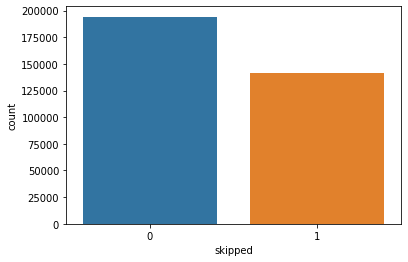

In [ ]:
sns.countplot(x='skipped',data=df1)
plt.show()

In [ ]:
#splitting the data
X = df1.drop(columns=["skipped"]).fillna(-9999)
y=df1.skipped

In [ ]:
# Training set and Testing set
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.transform(X_test)

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_

In [ ]:
sum(explained_variance)

0.9561429054564095

In [ ]:
pca.n_components

2

Logistic regression

In [ ]:
#Model fitting
from sklearn.linear_model import LogisticRegression
lgmodel=LogisticRegression()
lgmodel.fit(X_train,y_train)
lgpred=lgmodel.predict(X_test)
lg_probability =lgmodel.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
acc_lg=accuracy_score(y_test,lgpred)
recall_lg=recall_score(y_test,lgpred)
precision_lg=precision_score(y_test,lgpred)
f1score_lg=f1_score(y_test,lgpred)
AUC_LR=roc_auc_score(y_test,lgpred)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,lgpred))
print("ROC_AUC Score:",AUC_LR)


Accuracy :  0.5806528472718608
ROC_AUC Score: 0.5002286847525179


In [ ]:
print(classification_report(y_test,lgpred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73     38983
           1       0.62      0.00      0.00     28169

    accuracy                           0.58     67152
   macro avg       0.60      0.50      0.37     67152
weighted avg       0.60      0.58      0.43     67152



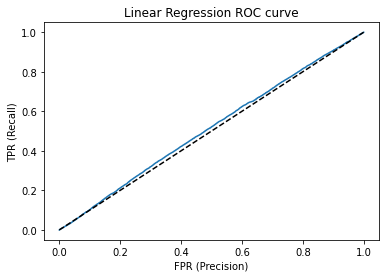

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lg_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[38969    14]
 [28146    23]]


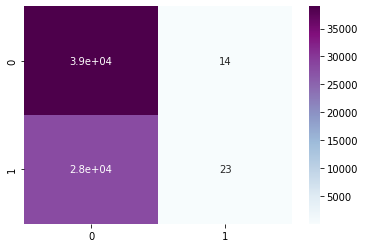

In [ ]:
cm=confusion_matrix(y_test,lgpred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')
plt.show()

Decision tree classifier

In [ ]:
#fitting training set into model
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion="gini")
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
dtpred=dt_model.predict(X_test)
dt_probability = dt_model.predict_proba(X_test)[:,1]
AUC_DT=roc_auc_score(dtpred,y_test)
acc_dtree=accuracy_score(y_test,dtpred)
recall_dt=recall_score(y_test,dtpred)
precision_dt=precision_score(y_test,dtpred)
f1score_dt=f1_score(y_test,dtpred)

print(accuracy_score(dtpred,y_test))
print("ROC_AUC Score:",AUC_DT)

0.895818441744103
ROC_AUC Score: 0.8929588482731771


In [ ]:
print(classification_report(dtpred,y_test))


              precision    recall  f1-score   support

           0       0.91      0.91      0.91     38921
           1       0.88      0.87      0.88     28231

    accuracy                           0.90     67152
   macro avg       0.89      0.89      0.89     67152
weighted avg       0.90      0.90      0.90     67152



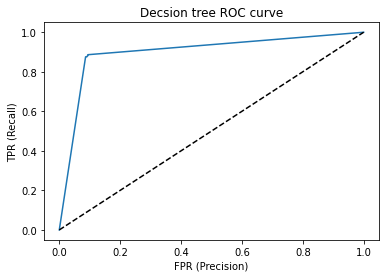

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, dt_probability)

plt.title('Decsion tree ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[35454  3467]
 [ 3529 24702]]


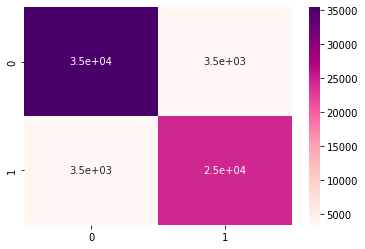

In [ ]:
cm=confusion_matrix(dtpred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')
plt.show()

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randommodl = RandomForestClassifier()
randommodl.fit(X_train, y_train)
randompred = randommodl.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report

RF_probability = randommodl.predict_proba(X_test)[:,1]
AUC_RF=roc_auc_score(randompred,y_test)
acc_random=accuracy_score(y_test,randompred)
recall_random=recall_score(y_test,randompred)
precision_random=precision_score(y_test,randompred)
f1score_rf=f1_score(y_test,randompred)

print(accuracy_score(randompred,y_test))
print("ROC_AUC Score:",AUC_RF)


0.8982606623778889
ROC_AUC Score: 0.8958441981298734


In [ ]:
print(classification_report(randompred,y_test))


              precision    recall  f1-score   support

           0       0.91      0.91      0.91     39177
           1       0.88      0.88      0.88     27975

    accuracy                           0.90     67152
   macro avg       0.90      0.90      0.90     67152
weighted avg       0.90      0.90      0.90     67152



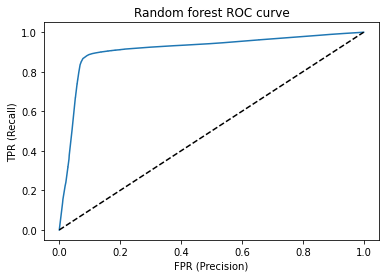

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Random forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[35664  3513]
 [ 3319 24656]]


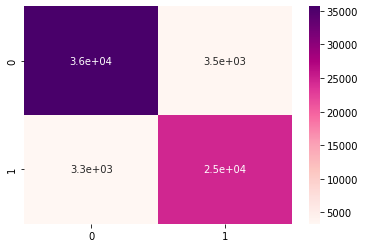

In [ ]:
cm=confusion_matrix(randompred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')
plt.show()

XGB Classifier

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
y_predict = xgb.predict(X_test)
XGB_probability =xgb.predict_proba(X_test)[:,1]

acc_xgb=accuracy_score(y_test,y_predict)
recall_xgb=recall_score(y_test,y_predict)
precision_xgb=precision_score(y_test,y_predict)
f1score_xgb=f1_score(y_test,y_predict)

AUC_xgb=roc_auc_score(y_predict,y_test)


print(accuracy_score(y_predict,y_test))
print("ROC_AUC Score:",AUC_xgb)

0.5813378603764594
ROC_AUC Score: 0.6063799760518964


In [ ]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73     66943
           1       0.00      0.63      0.01       209

    accuracy                           0.58     67152
   macro avg       0.50      0.61      0.37     67152
weighted avg       0.99      0.58      0.73     67152



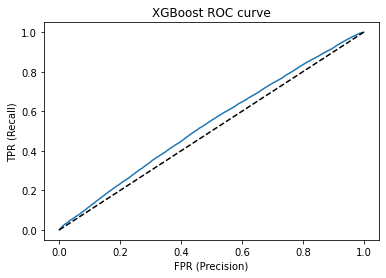

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[38906    77]
 [28037   132]]


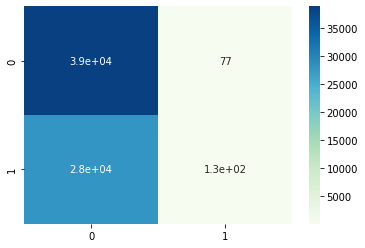

In [ ]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and DecisiontreeClassifier models performed better than Logistics Regression model. Thus, for the given problem, the models created by Random Forest and DecisiontreeClassifier.